# Partie 2 : Analyse & visualisation

## Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Lecture des données

In [2]:
dataset = pd.read_csv('./src/airplane_crashes_clean.csv', encoding='utf-8')
dataset.shape

(4998, 25)

In [3]:
from datetime import datetime
from datetime import time

date_format = '%Y-%m-%d'
dataset['datetime'] = dataset['datetime'].apply(lambda x: datetime.strptime(x, date_format))

## Statistiques basiques

In [113]:
pd.set_option('display.max_columns', 30)
dataset.describe(include='all')

,Date,Time,Location,Operator,Route,AC Type,Military,Postal_Cargo,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,datetime,time,hour,month,origin,destination,straight,stops,country
count,4998,3483,4993,4988,4220,4983,4998,4998,4980.000000,4770.000000,4773.000000,4990.000000,4757.000000,4758.000000,4956.000000,4934,4998,4998,3483.000000,4998.000000,3988,3985,3996,3996.000000,4993
unique,4570,1057,4055,2243,3781,2432,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4839,NaN,1058,NaN,NaN,1986,2147,2,NaN,258
top,8/31/1988,15:00,"Moscow, Russia",Aeroflot,Training,Douglas DC-3,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed under unknown circumstances.,NaN,0,NaN,NaN,Paris,Paris,Yes,NaN,USA
freq,4,38,19,257,100,333,4216,4521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,1515,NaN,NaN,47,54,3385,NaN,1035
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.197189,27.000839,4.482506,22.374148,19.047299,3.581547,1.719128,NaN,1971-07-04 09:31:37.238895528,NaN,12.662647,6.700880,NaN,NaN,NaN,0.223223,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1908-09-17 00:00:00,NaN,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,NaN,1951-06-15 06:00:00,NaN,8.000000,4.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,NaN,1970-11-27 00:00:00,NaN,13.000000,7.000000,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,NaN,1992-06-06 18:00:00,NaN,17.000000,10.000000,NaN,NaN,NaN,0.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000,NaN,2023-11-01 00:00:00,NaN,23.000000,12.000000,NaN,NaN,NaN,5.000000,NaN


## Pistes d'analyse

- Différencier les vols militaires / commerciaux / service postal, transport de marchandises
- Les vols militaires enregistrent-ils plus d'accidents que les vols commerciaux ?
- Quelles sont les routes qui présentent le plus d'accidents ?
- Les crashs sont-ils plus nombreux dans le passé ?
- Comment évolue le nombre de crash dans le temps ? 
- Le mois ou l'heure influencent-ils les chances d'accident ?
- Y a-t-il des compagnies qui ont plus de crashs que d'autres ?
- Quelles sont les compagnies les moins sûres ?
- Le modèle de l'avion influence t-il la probabilité de crasher ?
- Quel est le pourcentage de survie en cas de crash ? 
- Observer le nombre de passagers VS morts
- Le nombre de passagers dans l'avion a-t-il une influence ?
- Quelle est la fréquence des morts au sol causées par les crashs d'avion ?

## Calculs & aggrégations

### Bilan humain

In [4]:
# Le nombre de pertes humaines :
print('Nombre de morts :', round(dataset['Fatalities'].sum() + dataset['Ground'].sum()))
print('- dont passagers :', round(dataset['Fatalities Passangers'].sum()))
print('- dont équipage :', round(dataset['Fatalities Crew'].sum()))
print('- dont au sol :', round(dataset['Ground'].sum()))
print(f"Total : {round(dataset['Aboard'].sum() + dataset['Ground'].sum())} personnes")

Nombre de morts : 120167
- dont passagers : 90608
- dont équipage : 17041
- dont au sol : 8520
Total : 163882 personnes


In [5]:
# Les crashs les plus meurtriers de l'histoire :
dataset.sort_values(by='Fatalities', ascending=False).head(3)

,Date,Time,Location,Operator,Route,AC Type,Military,Postal_Cargo,Aboard,Aboard Passangers,...,Summary,datetime,time,hour,month,origin,destination,straight,stops,country
2885,3/27/1977,17:07,"Tenerife, Canary Islands, Spain",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing 747-121 / Boeing 747-206B,No,No,644.0,614.0,...,Both aircraft were diverted to Tenerife becaus...,1977-03-27,17:07:00,17.0,3,Tenerife,Las Palmas,No,1.0,Spain
3324,08/12/1985,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Tokyo - Osaka,Boeing 747-SR46,No,No,524.0,509.0,...,The aircraft suffered an aft pressure bulkhead...,1985-08-12,18:56:00,18.0,8,Tokyo,Osaka,Yes,0.0,Japan
4039,11/12/1996,18:40,"Near Charkhi Dadri, India",Saudi Arabian Airlines / Kazakhstan Airlines,New Delhi - Dhahran / Chimkent - New Delhi,Boeing 747-168B / Ilyushin IL-76TD,No,No,349.0,316.0,...,Midair collision 17 km W of New Delhi. The Sa...,1996-11-12,18:40:00,18.0,11,New Delhi,New Delhi,No,1.0,India


### Taille de l'avion

In [7]:
# Le nombre de passagers moyen :
print('Nombre moyen de passagers à bord :', round(dataset['Aboard'].mean()))
print('Nombre moyen de membres à bord :', round(dataset['Aboard Crew'].mean()))
print('Nombre moyen de morts à bord :', round(dataset['Fatalities'].mean()))
print('Nombre moyen de morts au sol :', round(dataset['Ground'].mean()))

Nombre moyen de passagers à bord : 31
Nombre moyen de membres à bord : 4
Nombre moyen de morts à bord : 22
Nombre moyen de morts au sol : 2


In [8]:
# Les avions avec le plus de passagers à bord :
dataset.sort_values(by='Aboard', ascending=False).head(3)

,Date,Time,Location,Operator,Route,AC Type,Military,Postal_Cargo,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,datetime,time,hour,month,origin,destination,straight,stops,country
2885,3/27/1977,17:07,"Tenerife, Canary Islands, Spain",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing 747-121 / Boeing 747-206B,No,No,644.0,614.0,30.0,583.0,560.0,23.0,0.0,Both aircraft were diverted to Tenerife becaus...,1977-03-27,17:07:00,17.0,3,Tenerife,Las Palmas,No,1.0,Spain
3324,08/12/1985,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Tokyo - Osaka,Boeing 747-SR46,No,No,524.0,509.0,15.0,520.0,505.0,15.0,0.0,The aircraft suffered an aft pressure bulkhead...,1985-08-12,18:56:00,18.0,8,Tokyo,Osaka,Yes,0.0,Japan
4201,7/23/1999,11:25,"Tokyo, Japan",All Nippon Airways,"Tokyo, Japan - Chitose, Japan",Boeing 747,No,No,517.0,503.0,14.0,1.0,0.0,1.0,0.0,Two minutes after taking off from Haneda Airpo...,1999-07-23,11:25:00,11.0,7,"Tokyo, Japan","Chitose, Japan",Yes,0.0,Japan


### Vol direct / non-direct

In [9]:
# Le nombre de crashs lorsque le vol est direct ou non :
print('Crashs vol direct :', len(dataset[dataset['straight'] == 'Yes']))
print('Crashs vol non-direct :', len(dataset[dataset['straight'] == 'No']))

Crashs vol direct : 3385
Crashs vol non-direct : 611


In [10]:
# Le nombre de crashs VS le nombre de correspondances :
dataset['stops'].value_counts()

stops
0.0    3385
1.0     405
2.0     146
3.0      47
4.0      11
5.0       2
Name: count, dtype: int64

### Lieu de crash

In [11]:
# Où ont lieu les crashs ?
dataset['Location'].value_counts().head(15)

Location
Moscow, Russia                                         19
Manila, Philippines                                    15
Cairo, Egypt                                           13
Sao Paulo, Brazil                                      13
Near Moscow, Russia                                    12
Bogota, Colombia                                       12
Rio de Janeiro, Brazil                                 12
Chicago, Illinois, USA                                 11
New York, USA                                          10
Tehran, Iran                                           10
Ankara, Turkey                                          9
London, England                                         8
Taipei, Taiwan                                          8
Over the North Atlantic Ocean, North Atlantic Ocean     8
Rome, Italy                                             8
Name: count, dtype: int64

In [ ]:
# Dans quels pays ont lieu les crashs ?
dataset['country'].value_counts().head(15)

country
USA            1035
Russia          293
Brazil          176
Colombia        151
Canada          147
France          126
England         110
India           107
Indonesia        99
China            95
Mexico           89
Germany          89
Italy            86
Philippines      77
Australia        67
Name: count, dtype: int64

### Type de vol & itinéraire

In [13]:
# Les itinéraires avec le plus de crashs :
dataset['Route'].value_counts().head(15)

Route
Training                      100
Sightseeing                    39
Test flight                    33
Military exercise               8
Sao Paulo - Rio de Janeiro      7
Demonstration                   6
Rio de Janeiro - Sao Paulo      5
Barranquilla - Bogota           4
Paris - London                  4
Tallinn - Helsinki              4
Huambo - Luanda                 4
Sao Paulo - Porto Alegre        4
Bogota - Barranquilla           4
Survey flight                   4
Villavicencio - Mitu            4
Name: count, dtype: int64

In [14]:
# De quelle ville partaient les vols ayant crashé ?
dataset['origin'].value_counts().head(15)

origin
Paris             47
London            44
Moscow            42
New York City     39
Rome              34
Bogota            34
Chicago           28
Miami             26
Sao Paulo         26
Los Angeles       23
Rio de Janeiro    22
Cairo             21
Manila            21
Mexico City       20
New York          19
Name: count, dtype: int64

In [15]:
# Vers quelle destination partaient les vols ayant crashé ?
dataset['destination'].value_counts().head(15)

destination
Paris             54
Moscow            39
London            35
Los Angeles       32
New York City     29
Chicago           24
Miami             23
Rome              23
Rio de Janeiro    21
Mexico City       20
Bogota            20
Cairo             20
Manila            18
New York          17
La Paz            17
Name: count, dtype: int64

### Transport postal & cargo

In [71]:
mail_crashes = dataset[dataset['Postal_Cargo']=='Yes']
print('Crashs liés au transport de colis & marchandises :', len(mail_crashes))
print('Morts liés au transport de colis & marchandises :', round(mail_crashes['Fatalities'].sum()))

Crashs liés au transport de colis & marchandises : 477
Morts liés au transport de colis & marchandises : 1920


### Militaire ou civil

In [72]:
military_crashes = dataset[dataset['Military']=='Yes']
civil_crashes = dataset[(dataset['Military']=='No') & (dataset['Postal_Cargo']=='No')]

In [73]:
# Le nombre de vols militaires et non-militaires :
dataset['Military'].value_counts()

Military
No     4216
Yes     782
Name: count, dtype: int64

In [74]:
# En pourcentage :
dataset['Military'].value_counts(normalize=True)*100

Military
No     84.353741
Yes    15.646259
Name: proportion, dtype: float64

In [75]:
# Les forces aériennes militaires ayant le plus de crashs :
military_crashes['Operator'].value_counts().head(15)

Operator
Military - U.S. Air Force                 141
Military - Royal Air Force                 54
Military - U.S. Army Air Forces            43
Military - U.S. Navy                       29
Military - U.S. Army                       27
Military - German Navy                     15
Military - Indian Air Force                15
Military - Afghan Republican Air Force     15
Military - Russian Air Force               14
Military - Soviet Air Force                12
Military - U.S. Marine Corps               12
Military - Royal Australian Air Force      11
Military - Brazilian Air Force             10
Military - French Air Force                 8
Military - Philippine Air Force             8
Name: count, dtype: int64

### Compagnie aérienne

In [82]:
# Les compagnies aériennes ayant le plus de crashs :
civil_crashes['Operator'].value_counts().head(15)

Operator
Aeroflot                               246
Air France                              68
Deutsche Lufthansa                      62
United Air Lines                        42
Pan American World Airways              39
American Airlines                       37
KLM Royal Dutch Airlines                34
China National Aviation Corporation     31
Private                                 30
Philippine Air Lines                    30
British Overseas Airways                29
Indian Airlines                         29
Eastern Air Lines                       25
Northwest Orient Airlines               25
Aeropostale                             23
Name: count, dtype: int64

### Type d'aéronef

In [83]:
# Les modèles d'avion civil ayant plus de 100 passagers à bord :
civil_crashes[civil_crashes['Aboard']>=100]['AC Type'].value_counts().head(15)

AC Type
McDonnell Douglas MD-82       8
McDonnell Douglas DC-10-30    7
McDonnell Douglas DC-9-32     6
Boeing 707-321B               5
McDonnell Douglas DC-10-10    5
Ilyushin IL-18B               5
Tupolev TU-154B               5
Tupolev TU-104B               4
Tupolev TU-154M               4
Boeing 737-200                3
Boeing 747                    3
Tupolev Tu-154M               3
Boeing 727-224                3
Boeing 737-2A8                3
McDonnell Douglas MD-11       3
Name: count, dtype: int64

In [84]:
# Les modèles d'avion civil ayant moins de 30 passagers à bord :
civil_crashes[civil_crashes['Aboard']<30]['AC Type'].value_counts().head(15)

AC Type
Douglas DC-3                                267
de Havilland Canada DHC-6 Twin Otter 300     72
Junkers JU-52/3m                             31
Douglas C-47A                                23
Douglas C-47                                 22
Breguet 14                                   22
Lockheed 18 Lodestar                         15
Junkers F-13                                 15
Embraer 110P1 Bandeirante                    15
Douglas DC-4                                 14
Boeing 40                                    13
Yakovlev YAK-40                              13
Ilyushin IL-12                               12
de Havilland Canada DHC-6 Twin Otter 100     11
de Havilland Canada DHC-6 Twin Otter 200     11
Name: count, dtype: int64

### Crashs récents

Ici nous nous intéressons aux accidents ayant eu lieu depuis 1990 à nos jours.

In [101]:
recent_crashes = dataset[dataset['datetime'] > datetime(1990,1,1)]
print('Part des crashs récents (depuis 2010) :', round(len(recent_crashes)/len(dataset)*100,2), '%')

Part des crashs récents (depuis 2010) : 27.99 %


In [102]:
print('Dont civils :', round(len(recent_crashes[(recent_crashes['Military'] == 'No') & (recent_crashes['Postal_Cargo'] == 'No')])/len(recent_crashes)*100,2), '%')
print('Dont militaires :', round(len(recent_crashes[recent_crashes['Military'] == 'Yes'])/len(recent_crashes)*100,2), '%')
print('Dont mail/cargo :', round(len(recent_crashes[recent_crashes['Postal_Cargo'] == 'Yes'])/len(recent_crashes)*100,2), '%')

Dont civils : 69.48 %
Dont militaires : 16.44 %
Dont mail/cargo : 14.3 %


In [103]:
recent_civil_crashes = recent_crashes[(recent_crashes['Military'] == 'No') & (recent_crashes['Postal_Cargo'] == 'No')]

In [104]:
# Les compagnies aériennes ayant le plus de crashs depuis 1990 : 
recent_civil_crashes['Operator'].value_counts().head(15)

Operator
Aeroflot                      13
Merpati Nusantara Airlines    11
Private                       11
American Airlines              6
Air France                     5
MIAT - Mongolian Airlines      5
TAM (Brazil)                   5
Cubana de Aviacion             5
United Air Lines               4
Philippine Air Lines           4
Garuda Indonesia Airlines      4
Formosa Airlines               4
Dirgantara Air Services        4
Indian Airlines                4
China Airlines (Taiwan)        4
Name: count, dtype: int64

In [105]:
# Les modèles d'avion ayant le plus de crash depuis 1990 : 
recent_civil_crashes['AC Type'].value_counts().head(15)

AC Type
de Havilland Canada DHC-6 Twin Otter 300    37
Yakovlev YAK-40                             15
Antonov AN-26                               10
Embraer 110P1 Bandeirante                    8
McDonnell Douglas MD-82                      8
Fokker F-27 Friendship 600                   7
CASA 212 Aviocar 200                         7
Fokker 100                                   7
Let 410UVP-E                                 6
de Havilland Canada DHC-6 Twin Otter 200     6
Learjet 35A                                  6
Let 410UVP                                   6
Cessna 208B Grand Caravan                    6
Tupolev TU-154M                              5
Antonov AN-24RV                              5
Name: count, dtype: int64

In [106]:
# Les modèles d'avion civil avec plus de 100 passagers à bord : 
recent_civil_crashes[recent_civil_crashes['Aboard']>=100]['AC Type'].value_counts().head(15)

AC Type
McDonnell Douglas MD-82       7
Tupolev TU-154M               4
McDonnell Douglas MD-11       3
Tupolev Tu-154M               3
Tupolev 154M                  2
Airbus A310-324               2
McDonnell Douglas DC-10-30    2
McDonnell Douglas DC-9-32     2
Boeing 737-8HG                2
Airbus A321-231               2
Airbus A320-214               2
Airbus A320-211               2
Airbus A300B4-622R            2
Boeing 737-7H4                2
Airbus A320-233               2
Name: count, dtype: int64

In [107]:
# Les modèles d'avion civil avec moins de 30 passagers à bord : 
recent_civil_crashes[recent_civil_crashes['Aboard']<30]['AC Type'].value_counts().head(15)

AC Type
de Havilland Canada DHC-6 Twin Otter 300    37
Embraer 110P1 Bandeirante                    8
CASA 212 Aviocar 200                         7
Cessna 208B Grand Caravan                    6
Let 410UVP                                   6
Learjet 35A                                  6
Let 410UVP-E                                 6
de Havilland Canada DHC-6 Twin Otter 200     6
Antonov AN-28                                5
Antonov AN-2                                 5
Mil Mi-8T                                    4
Antonov AN-26                                4
Antonov AN-12                                4
Bell 206B                                    4
de Havilland Canada DHC-6 Twin Otter         4
Name: count, dtype: int64

## Impact des accidents aériens

### Les plus gros drames

In [114]:
# Le crash ayant causé le plus de morts :
index_of_max = dataset['Fatalities'].idxmax()
dataset.loc[index_of_max:index_of_max,:]

,Date,Time,Location,Operator,Route,AC Type,Military,Postal_Cargo,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,datetime,time,hour,month,origin,destination,straight,stops,country
2885,3/27/1977,17:07,"Tenerife, Canary Islands, Spain",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing 747-121 / Boeing 747-206B,No,No,644.0,614.0,30.0,583.0,560.0,23.0,0.0,Both aircraft were diverted to Tenerife becaus...,1977-03-27,17:07:00,17.0,3,Tenerife,Las Palmas,No,1.0,Spain


In [116]:
# Les crashs les plus meurtriers depuis 1990 :
recent_civil_crashes.sort_values(by='Fatalities', ascending=False).head(3)

,Date,Time,Location,Operator,Route,AC Type,Military,Postal_Cargo,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,datetime,time,hour,month,origin,destination,straight,stops,country
4039,11/12/1996,18:40,"Near Charkhi Dadri, India",Saudi Arabian Airlines / Kazakhstan Airlines,New Delhi - Dhahran / Chimkent - New Delhi,Boeing 747-168B / Ilyushin IL-76TD,No,No,349.0,316.0,33.0,349.0,316.0,33.0,0.0,Midair collision 17 km W of New Delhi. The Sa...,1996-11-12,18:40:00,18.0,11,New Delhi,New Delhi,No,1.0,India
4876,7/17/2014,16:19,"Hrabove, Ukraine",Malaysia Airlines,Amsterdam - Kuala Lumpur,Boeing 777-2H6ER,No,No,298.0,283.0,15.0,298.0,283.0,15.0,0.0,A Boeing 777-200 airliner operating as Malays...,2014-07-17,16:19:00,16.0,7,Amsterdam,Kuala Lumpur,Yes,0.0,Ukraine
3870,4/26/1994,20:16,"Near Komaki, Aichi, Japan",China Airlines (Taiwan),Taipei - Nagoya,Airbus A300B4-622R,No,No,271.0,256.0,15.0,264.0,249.0,15.0,0.0,"While on ILS approach to Nagoya Airport, at an...",1994-04-26,20:16:00,20.0,4,Taipei,Nagoya,Yes,0.0,Japan


In [ ]:
# Les crashs ayant causé le plus de morts au sol depuis 1990 :
# --> Il s'agit des attentats du 11 septembre
recent_civil_crashes.sort_values(by='Ground', ascending=False).head(3)

,Date,Time,Location,Operator,Route,AC Type,Military,Postal_Cargo,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,datetime,time,hour,month,origin,destination,straight,stops,country
4329,09/11/2001,09:03,"New York City, New York, USA",United Air Lines,Boston - Los Angeles,Boeing 767-222,No,No,65.0,56.0,9.0,65.0,56.0,9.0,2750.0,The aircraft was hijacked shortly after it lef...,2001-09-11,09:03:00,9.0,9,Boston,Los Angeles,Yes,0.0,USA
4328,09/11/2001,08:47,"New York City, New York, USA",American Airlines,Boston - Los Angeles,Boeing 767-223ER,No,No,92.0,81.0,11.0,92.0,81.0,11.0,2750.0,The aircraft was hijacked shortly after it lef...,2001-09-11,08:47:00,8.0,9,Boston,Los Angeles,Yes,0.0,USA
3986,01/08/1996,12:43,"Kinshasa, Democratic Republic of Congo",African Air,Kinshasa - Kahemba,Antonov AN-32B,No,No,6.0,0.0,6.0,2.0,0.0,2.0,225.0,The aircraft failed to gain altitude after tak...,1996-01-08,12:43:00,12.0,1,Kinshasa,Kahemba,Yes,0.0,Democratic Republic of Congo


### Les miraculés

In [127]:
# La probabilité de mourir / survivre à un crash :
print('Probabilité de mourir dans un crash :',round(dataset['Fatalities'].sum()/dataset['Aboard'].sum()*100,2), '%')
print('Probabilité de survie :',round((dataset['Aboard'].sum() - dataset['Fatalities'].sum())/dataset['Aboard'].sum()*100,2), '%')

Probabilité de mourir dans un crash : 71.86 %
Probabilité de survie : 28.14 %


In [128]:
# Les vols avec le plus de passagers mais avec le moins de morts :
temp_index = ((dataset['Aboard'] - dataset['Fatalities'])).sort_values(ascending=False).index.to_list()
dataset.loc[temp_index,:].head(3)

,Date,Time,Location,Operator,Route,AC Type,Military,Postal_Cargo,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,datetime,time,hour,month,origin,destination,straight,stops,country
4201,7/23/1999,11:25,"Tokyo, Japan",All Nippon Airways,"Tokyo, Japan - Chitose, Japan",Boeing 747,No,No,517.0,503.0,14.0,1.0,0.0,1.0,0.0,Two minutes after taking off from Haneda Airpo...,1999-07-23,11:25:00,11.0,7,"Tokyo, Japan","Chitose, Japan",Yes,0.0,Japan
4107,12/28/1997,23:10,"Over the Pacific Ocean, Pacific Ocean",United Air Lines,Tokyo - Honolulu,Boeing 747-122,No,No,393.0,374.0,19.0,1.0,1.0,0.0,0.0,"Two hours into the flight, at FL 310, the plan...",1997-12-28,23:10:00,23.0,12,Tokyo,Honolulu,Yes,0.0,Pacific Ocean
3380,09/05/1986,06:00,"Karachi, Pakistan",Pan American World Airways,Bombay-Karachi-Frankfurt-New York,Boeing 747-121,No,No,384.0,364.0,20.0,16.0,14.0,1.0,1.0,"While on the ground, four hijackers opened fir...",1986-09-05,06:00:00,6.0,9,Bombay,New York,No,2.0,Pakistan


## Visualisation

#### Évolution des crashs d'avion depuis 1908 à nos jours

*Dans le domaine civil :*

- Les crashs d'avion connaissent un augmentation continue à partir de 1920.

- Ils stagnent en 1950 jusque dans les années 1975 où l'on totalise en moyenne 50 crashs chaque année.

- À partir de la fin des années 1990 les crashs d'avion diminuent fortement et descendent en-dessous de 20 crashs par année à partir de 2017.


*Dans le domaine militaire :*

- On observent que les crashs d'avion sont particulièrement élevés pendant les périodes qui correspondent à la 1ère et 2nde guerre mondiale.

- De même que dans le domaine civil on observe une diminution à partir de la fin des années 90.

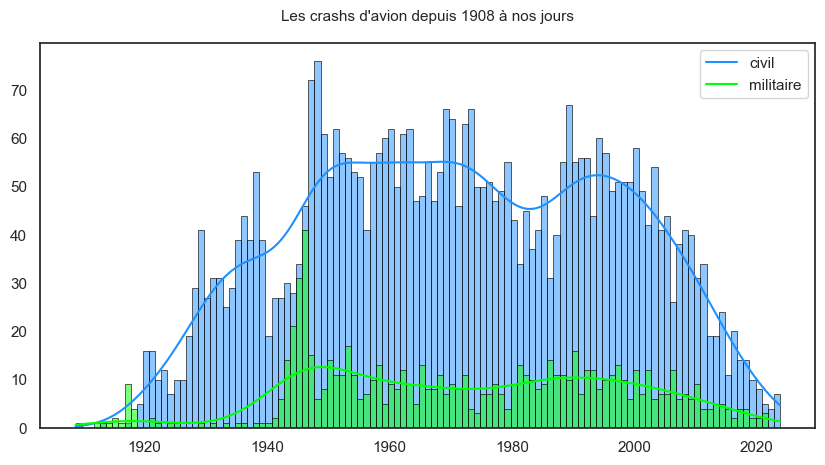

In [241]:
# Visualisation :
sns.set(rc={"figure.figsize":(10, 5)}, style = 'white')
sns.histplot(data=dataset, x='datetime', hue='Military', kde=True, palette=['lime', 'dodgerblue'], edgecolor='black', bins=115)
plt.legend(labels=['civil','militaire'], fontsize=11)
plt.ylabel('', fontsize=10)
plt.xlabel('', fontsize=10)
plt.title("Les crashs d'avion depuis 1908 à nos jours", fontsize=11, pad=16)
plt.show()

#### Évolution des crashs d'avion récents

On observe qu'il y a de moins en moins de crashs d'avion à partir de la fin des années 90.

La pente de diminution est d'autant plus forte dans le domaine civil que militaire.

Dans le domaine civil on descend en-dessous de 20 crashs par année à partir de 2017.

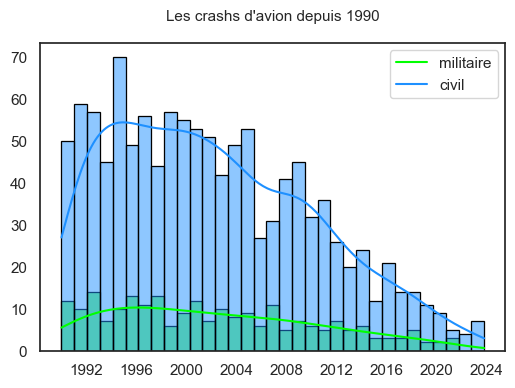

In [240]:
# Visualisation :
sns.set(rc={"figure.figsize":(6,4)}, style = 'white')
sns.histplot(data=recent_crashes, x='datetime', hue='Military', kde=True, palette=['dodgerblue', 'lime'], edgecolor='black', bins=33)
plt.legend(labels=['militaire', 'civil'], fontsize=11)
plt.ylabel('', fontsize=10)
plt.xlabel('', fontsize=10)
plt.title("Les crashs d'avion depuis 1990", fontsize=11, pad=16)
plt.show()

### Regroupement par année

In [139]:
# Ajout de la colonne année (year) :
dataset['year'] = dataset['datetime'].apply(lambda x: x.year)

In [140]:
# Nombre de crashs et de morts par année :
crashes_count = dataset.groupby('year')['Date'].count().to_frame().reset_index()
fatalities_count = dataset.groupby('year')['Fatalities'].sum().to_frame().reset_index()

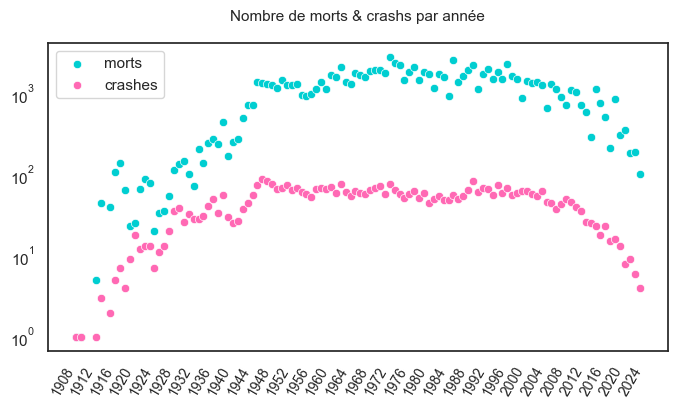

In [146]:
# Visualisation :
sns.set(rc={"figure.figsize":(8, 4)}, style = 'white')
sns.scatterplot(data=fatalities_count, x='year', y='Fatalities', color='darkturquoise')
sns.scatterplot(data=crashes_count, x='year', y='Date', color='hotpink')
plt.yscale('log')
plt.legend(labels=["morts", 'crashes'])
plt.ylabel('', fontsize=10)
plt.xlabel('', fontsize=10)
plt.xticks([i for i in range(1908,2025,4)], [i for i in range(1908,2025,4)], fontsize=10, rotation=60, ha='right')
plt.title("Nombre de morts & crashs par année", fontsize=11, pad=16)
plt.show()

#### Évolution du nombre de morts dans le temps

On observe que jusque dans les années 1960 les crashs d'avion causaient en moyenne moins de 100 morts.

Après 1970 le nombre moyen de morts augmente et dépasse dans certains cas les 300 morts.

Nous pouvons émettre l'hypothèse que cela est lié à l'augmentation de la capacité de transport des avions.

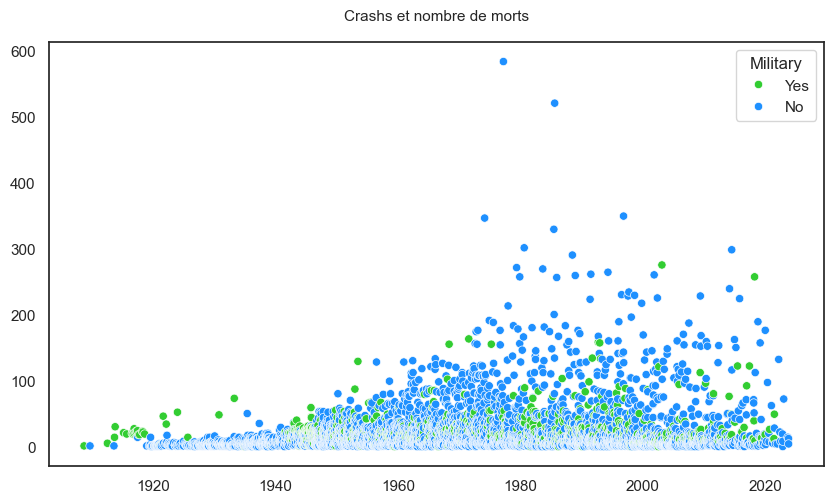

In [222]:
# Visualisation :
sns.set(rc={"figure.figsize":(10, 5.5)}, style = 'white')
sns.scatterplot(data=dataset, x='datetime', y='Fatalities', palette=['limegreen', 'dodgerblue'], hue='Military')
plt.ylabel('', fontsize=10)
plt.xlabel('', fontsize=10)
plt.title("Crashs et nombre de morts", fontsize=11, pad=16)
plt.show()

In [239]:
print('Nombre moyen de passagers :')
print('Avant 1975 :', round(dataset[dataset['year'] <= 1975]['Aboard'].mean()))
print('Après 1975 :', round(dataset[dataset['year'] > 1975]['Aboard'].mean()))
print('')
print('Nombre moyen de morts :')
print('Avant 1975 :', round(dataset[dataset['year'] <= 1975]['Fatalities'].mean()))
print('Après 1975 :', round(dataset[dataset['year'] > 1975]['Fatalities'].mean()))

Nombre moyen de passagers :
Avant 1975 : 24
Après 1975 : 40

Nombre moyen de morts :
Avant 1975 : 19
Après 1975 : 27


#### Le mois de survenue de l'accident

On observe qu'il y a plus de crashs pendant la période estivale, et en décembre et janvier.

On peut émettre l'hypothèse qu'il y a plus de vols à ces périodes spécifiques de l'année, qui correspondent aux vacances d'été et aux fêtes de fin d'année.

Or plus il y a de vols plus on augmente les chances d'accidents.

In [147]:
# Le mois a-t-il un impact sur la survenue d'un accident ?
months_df = dataset['month'].value_counts().to_frame().reset_index()

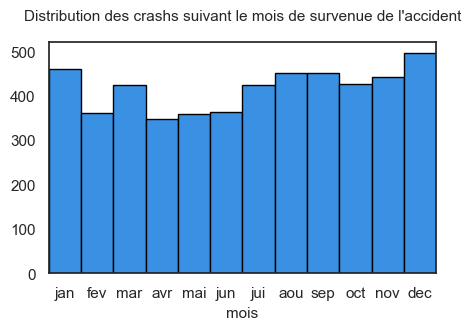

In [160]:
# Visualisation :
sns.set(rc={"figure.figsize":(5, 3)}, style = 'white')
sns.barplot(data=months_df, x=months_df['month'], y=months_df['count'], color='dodgerblue', edgecolor='black', width=1)
plt.ylabel('', fontsize=11)
plt.xlabel('mois', fontsize=11)
plt.xticks([i for i in range(12)], ['jan', 'fev', 'mar', 'avr', 'mai', 'jun', 'jui', 'aou', 'sep', 'oct', 'nov', 'dec'])
plt.title("Distribution des crashs suivant le mois de survenue de l'accident", fontsize=11, pad=16)
plt.show()

#### L'heure de survenue de l'accident

On observe que les crashs d'avion sont plus fréquents entre 7h et 20h.

À partir de 21h et jusqu'à 6h du matin on enregistre moins de crashs.

On peut émettre l'hypothèse qu'il y a moins de vols pendant cette plage horaire et plus de vols entre 7h et 20h.

In [48]:
# L'heure a-t-elle un impact sur la survenue d'un accident ?
hours_df = dataset['hour'].value_counts().to_frame().reset_index()

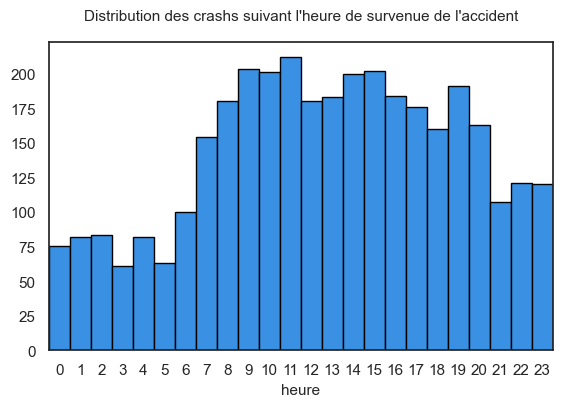

In [49]:
# Visualisation :
sns.set(rc={"figure.figsize":(6.5, 4)}, style = 'white')
sns.barplot(data=hours_df, x=hours_df['hour'], y=hours_df['count'], color='dodgerblue', edgecolor='black', width=1)
plt.ylabel('', fontsize=11)
plt.xlabel('heure', fontsize=11)
plt.xticks([i for i in range(0,24)], [i for i in range(0,24)])
plt.title("Distribution des crashs suivant l'heure de survenue de l'accident", fontsize=11, pad=16)
plt.show()

## Matrice de corrélation

In [ ]:
dataset_for_corr = dataset.copy()

dataset_for_corr['military_'] = dataset['Military'].apply(lambda x: 1 if x =='Yes' else 0)
dataset_for_corr['cargo_'] = dataset['Postal_Cargo'].apply(lambda x: 1 if x =='Yes' else 0)
dataset_for_corr['straight_'] = dataset['straight'].apply(lambda x: 1 if x =='Yes' else 0)
dataset_for_corr['time_'] = dataset['time'].apply(lambda x: int(x.split(':')[0]))

In [ ]:
to_drop = ['Date', 'Time', 'Location', 'Operator', 'Route', 'AC Type', 'Military', 'Postal_Cargo', 'Summary', 'origin', 'destination', 'straight', 'country', 'time']
dataset_for_corr.drop(columns=to_drop, inplace=True)

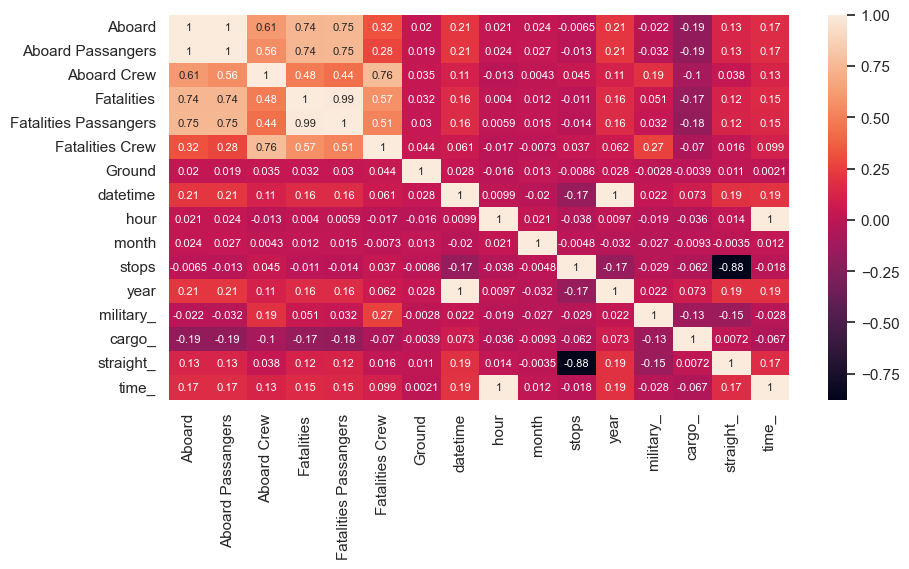

In [258]:
# Matrice de corrélation : 
corr = dataset_for_corr.corr()
sns.set(rc={"figure.figsize":(10, 5)})
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"fontsize":8}
)
plt.show()

La matrice de corrélation confirme les observations faites précédemment :

- Il y a une corrélation forte entre le nombre de passagers et le nombre de morts : la probabilité de mourir lorsqu'il y a un crash est très élevée (71%). 

- Il y a une corrélation positive entre la composition de l'avion (nombre de passagers) avec la date : la taille des avions et la capacité de transport a augmenté dans le temps.

- Il y a une corrélation négative entre le nombre de morts et le fait qu'il s'agisse d'un avion de fret ou cargo : ces avions transportent des marchandises et très peu de personnes.





### Boeing & Airbus

Nous nous intéressons ici aux avions commerciaux les plus connus de nos jours.

In [202]:
airbus = dataset[(dataset['AC Type'].astype(str).str.contains('.*Airbus*.')) & (dataset['datetime'] >= datetime(1990,1,1))]
boeing = dataset[(dataset['AC Type'].astype(str).str.contains('.*Boeing*.')) & (dataset['datetime'] >= datetime(1990,1,1))]

In [203]:
print('Nombre de crashs impliquant un Airbus depuis 1990 à nos jours :', len(airbus))
print('Nombre de crashs impliquant un Boeing depuis 1990 à nos jours :', len(boeing))

Nombre de crashs impliquant un Airbus depuis 1990 à nos jours : 43
Nombre de crashs impliquant un Boeing depuis 1990 à nos jours : 141


In [ ]:
airbus['model_family'] = airbus['AC Type'].apply(lambda x: 'Airbus A300' if 'Airbus A300' in x 
                                                else 'Airbus A310' if 'Airbus A310' in x
                                                else 'Airbus A320' if 'Airbus A320' in x
                                                else 'Airbus A321' if 'Airbus A321' in x
                                                else 'Airbus A330' if 'Airbus A330' in x
                                                else 'Airbus A340' if 'Airbus A340' in x
                                                else x )

In [ ]:
boeing['model_family'] = boeing['AC Type'].apply(lambda x: 'Boeing 17' if 'Boeing 17' in x 
                                                else 'Boeing 221' if 'Boeing 221' in x
                                                else 'Boeing 247' if 'Boeing 247' in x
                                                else 'Boeing 29' if 'Boeing 29' in x
                                                else 'Boeing 307' if 'Boeing 307' in x
                                                else 'Boeing 314' if 'Boeing 314' in x
                                                else 'Boeing 377' if 'Boeing 377' in x
                                                else 'Boeing 40' if 'Boeing 40' in x
                                                else 'Boeing 50' if 'Boeing 50' in x
                                                else 'Boeing 52' if 'Boeing 52' in x
                                                else 'Boeing 707' if 'Boeing 707' in x
                                                else 'Boeing 720' if 'Boeing 720' in x
                                                else 'Boeing 727' if 'Boeing 727' in x
                                                else 'Boeing 737' if 'Boeing 737' in x
                                                else 'Boeing 747' if 'Boeing 747' in x
                                                else 'Boeing 757' if 'Boeing 757' in x
                                                else 'Boeing 767' if 'Boeing 767' in x
                                                else 'Boeing 777' if 'Boeing 777' in x
                                                else 'Boeing 95' if 'Boeing 95' in x
                                                else 'Boeing C-135' if 'Boeing C-135' in x
                                                else 'Boeing C-97' if 'Boeing C-97' in x
                                                else 'Boeing CH-47' if 'Boeing CH-47' in x
                                                else 'Boeing EC-135' if 'Boeing EC-135' in x
                                                else 'Boeing KC-135' if 'Boeing KC-135' in x
                                                else 'Boeing KC-97' if 'Boeing KC-97' in x
                                                else 'Boeing RB-52' if 'Boeing RB-52' in x
                                                else 'Boeing RC-135' if 'Boeing RC-135' in x
                                                else 'Boeing TB-29' if 'Boeing TB-29' in x
                                                else 'Boeing Vertol' if 'Boeing Vertol' in x
                                                else 'Boeing XB-29' if 'Boeing XB-29' in x
                                                else x )

In [206]:
airbus_count = airbus['model_family'].value_counts().to_frame().reset_index()
airbus_fatal = airbus.groupby('model_family')['Fatalities'].sum().to_frame().reset_index()
airbus_ground = airbus.groupby('model_family')['Ground'].sum().to_frame().reset_index()
airbus_data = airbus_count.set_index('model_family').join([airbus_fatal.set_index('model_family'), airbus_ground.set_index('model_family')]).reset_index()
airbus_data

,model_family,count,Fatalities,Ground
0,Airbus A320,15,1109.0,17.0
1,Airbus A300,11,1133.0,14.0
2,Airbus A310,8,828.0,0.0
3,Airbus A330,5,339.0,0.0
4,Airbus A321,3,377.0,0.0
5,Airbus A340,1,0.0,0.0


In [207]:
boeing_count = boeing['model_family'].value_counts().to_frame().reset_index()
boeing_fatal = boeing.groupby('model_family')['Fatalities'].sum().to_frame().reset_index()
boeing_ground = boeing.groupby('model_family')['Ground'].sum().to_frame().reset_index()
boeing_data = boeing_count.set_index('model_family').join([boeing_fatal.set_index('model_family'), boeing_ground.set_index('model_family')]).reset_index()
boeing_data = boeing_data.iloc[:7,:]
other_row = {'model_family': 'Autre', 'count': 3, 'Fatalities': 29+4+38, 'Ground': 0}
boeing_data.loc[len(boeing_data)] = other_row
boeing_data

,model_family,count,Fatalities,Ground
0,Boeing 737,70,4437.0,52.0
1,Boeing 747,20,1155.0,77.0
2,Boeing 727,17,1005.0,12.0
3,Boeing 707,11,177.0,30.0
4,Boeing 757,8,600.0,125.0
5,Boeing 767,7,855.0,5500.0
6,Boeing 777,5,540.0,1.0
7,Autre,3,71.0,0.0


Les avions Airbus qui enregistrent le plus de crashs sont les modèles A320, A300 et A310.

Plus d'un tiers des crashs impliquant un avion Airbus est un modèle A320.

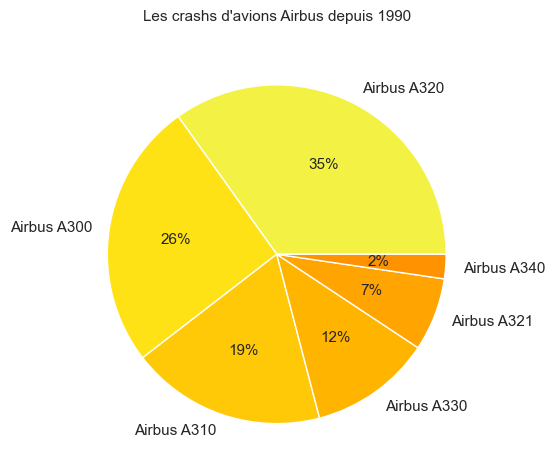

In [217]:
# Visualisation :
colors = sns.color_palette('Wistia')
plt.pie(airbus_count['count'], labels=airbus_count['model_family'], colors=colors, autopct='%.0f%%', textprops={'fontsize': 11})
plt.title("Les crashs d'avions Airbus depuis 1990", fontsize=11, pad=16)
plt.show()

Les avions Boeing qui enregistrent le plus de crashs sont les modèles Boeing 737, 747 et 727.

La moitié des crashs impliquant un avion Boeing est un modèle 737.

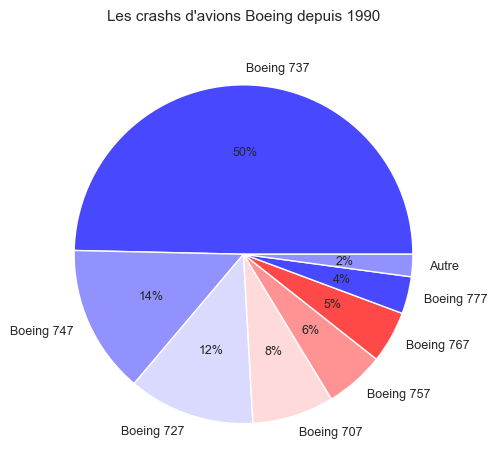

In [216]:
# Visualisation :
boeing_count = boeing_data.iloc[:, :2]
colors = sns.color_palette('bwr')
plt.pie(boeing_count['count'], labels=boeing_count['model_family'], colors=colors, autopct='%.0f%%', textprops={'fontsize': 9, 'fontweight':'normal'}, startangle=0, labeldistance=1.1)
plt.title("Les crashs d'avions Boeing depuis 1990", fontsize=11, pad=16)
plt.show()

## Export csv

In [57]:
dataset_for_tableau = dataset.copy()
dataset_for_tableau.drop(columns=['Summary', 'datetime', 'time'], inplace=True)
dataset_for_tableau.to_csv('./src/dataset_for_tableau.csv', index=False)